## Table of Contents
* [Part 1. Data Preparation](#1.-Data-Preparation)
    * [Section 1.1](#1.1.-Creating-an-Age-Variable-for-each-Bridge)
        * [Sub Section 1.1.1](#sub_section_1_1_1)
* [Chapter 2](#chapter2)
    * [Section 2.1](#section_2_1)
        * [Sub Section 2.1.1](#sub_section_2_1_1)
        * [Sub Section 2.1.2](#sub_section_2_1_2)
    * [Section 2.2](#section_2_2)
        * [Sub Section 2.2.1](#sub_section_2_2_1)
        * [Sub Section 2.2.2](#sub_section_2_2_2)
* [Chapter 3](#chapter3)
    * [Section 3.1](#section_3_1)
        * [Sub Section 3.1.1](#sub_section_3_1_1)
        * [Sub Section 3.1.2](#sub_section_3_1_2)
    * [Section 3.2](#section_3_2)
        * [Sub Section 3.2.1](#sub_section_3_2_1)
        * [Sub Section 3.2.2](#sub_section_3_2_2)

## 1. Data Preparation
In this section, the bridges data is uploaded and the data is cleaned for Part 2. Exploratory Analysis and Part 3. Linear Regression. Here, the categories are simplified and outliers are removed before the analysis between variables and current condition occurs.

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
bridges = pd.read_csv("tx19_bridges_sample.csv")
bridges

,Structure_id,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,...,Spans,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic
0,000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,...,2,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1
1,000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,...,1,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1
2,000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,...,1,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150
3,000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,...,14,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120
4,000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,...,1,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34288,DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,...,3,45.4,19.0,Good,Good,Good,64.3,40.0,No waterway,600
34289,DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,...,1,12.3,10.8,Good,Good,Good,35.1,40.0,No waterway,600
34290,DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,...,4,73.2,9.8,Good,Good,Good,24.5,25.0,No waterway,1500
34291,DAPFORHOO00005A,District9,0,Free,Military,Urban,Local,1991,2,0,...,2,27.8,10.4,Good,Good,Satisfactory,53.3,15.0,Stable,300


### 1.1. Creating an Age Variable for each Bridge
The age of each bridge is derived and put into a new column called "Age". It is derived using the year column with the code below.

In [3]:
bridges["Age"] = [2022 - i for i in bridges.Year]
bridges

,Structure_id,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,...,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic,Age
0,000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,...,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1,17
1,000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,...,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1,17
2,000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,...,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150,10
3,000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,...,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120,72
4,000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,...,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34288,DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,...,45.4,19.0,Good,Good,Good,64.3,40.0,No waterway,600,28
34289,DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,...,12.3,10.8,Good,Good,Good,35.1,40.0,No waterway,600,22
34290,DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,...,73.2,9.8,Good,Good,Good,24.5,25.0,No waterway,1500,26
34291,DAPFORHOO00005A,District9,0,Free,Military,Urban,Local,1991,2,0,...,27.8,10.4,Good,Good,Satisfactory,53.3,15.0,Stable,300,31


### 1.2. Excluding Old Bridges
Old bridges were excluded according to the distribution of the Year column. This method was preferred over excluding according to the Historic column, as some of the bridges that were 'Registered' Historic are not considered to be old, for example, some bridges are termed 'Historic' due to their location or association with a historical event.

Text(0.5, 1.0, 'A Histogram showing the distribution of Bridges by Year')

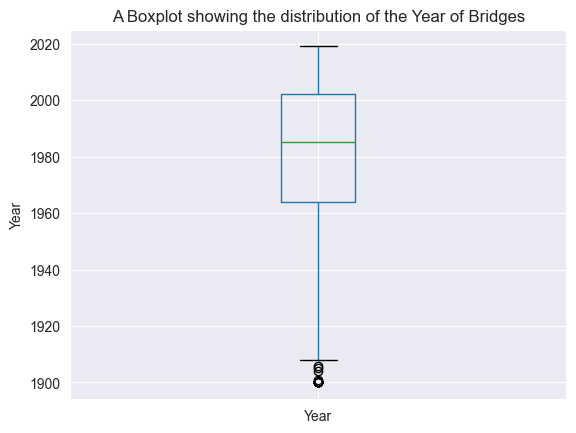

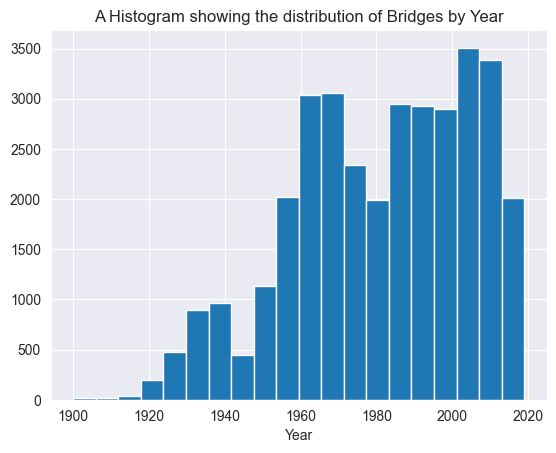

In [4]:
yearplot = bridges.boxplot(column= "Year")
plt.title("A Boxplot showing the distribution of the Year of Bridges")
plt.ylabel("Year")
plt.xlabel("")


hist_year = bridges.hist(column= "Year", bins = 20)
plt.xlabel("Year")
plt.title("A Histogram showing the distribution of Bridges by Year")

#### 1.2.1 How the Old Bridges were identified and removed?
This approach looks at the distribution of years as both a boxplot and a histogram; it highlights that the distribution is positively skewed, meaning that a most of the bridges built were from 1960's onwards. The histogram shows this more clearly, as there is a one-sided tail towards the left of the distribution from 1960s - this makes 1960s a perfect cut out point for old bridges to be removed from, which is done in the code below.

In [5]:
bridges  = bridges.drop(bridges[(bridges.Year < 1960)].index).copy()
bridges

,Structure_id,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,...,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic,Age
0,000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,...,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1,17
1,000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,...,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1,17
2,000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,...,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150,10
4,000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,...,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200,18
5,000021580-00093,District2,3,Free,Agency,Rural,Local,2005,2,0,...,49.1,8.5,Very Good,Very Good,Very Good,49.9,4.0,Dry,200,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34288,DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,...,45.4,19.0,Good,Good,Good,64.3,40.0,No waterway,600,28
34289,DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,...,12.3,10.8,Good,Good,Good,35.1,40.0,No waterway,600,22
34290,DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,...,73.2,9.8,Good,Good,Good,24.5,25.0,No waterway,1500,26
34291,DAPFORHOO00005A,District9,0,Free,Military,Urban,Local,1991,2,0,...,27.8,10.4,Good,Good,Satisfactory,53.3,15.0,Stable,300,31


### 1.3. Reducing the Number of Categories for both Design and Materials
Initially, the categories for both Design and Materials were looked at and the top two categories were kept while the other categories were merged into the 'Other' category. This would ensure that both Design and Materials will have three categories in total, which will make the linear regression analysis easier.


In [6]:
bridges.Material.value_counts()

Concrete    22595
Steel        5059
Timber        408
Other          39
Masonry         1
Name: Material, dtype: int64

In [7]:
def material(row):
    if (row.Material == "Other") or (row.Material == "Masonry") or (row.Material == "Timber"): return "Others"
    else: return row.Material


bridges = bridges.assign(Material = bridges.apply(material, axis = 1))
bridges.Material.unique()

array(['Concrete', 'Others', 'Steel'], dtype=object)

In [8]:
bridges.Design.value_counts()

Beam          24735
Slab           2004
Other          1201
Arch             91
Frame            39
Truss            20
Movable           9
Suspension        3
Name: Design, dtype: int64

In [9]:
def design(row):
    if (row.Design == "Other") or (row.Design == "Arch") or (row.Design == "Frame") or (row.Design == "Truss") or (row.Design == "Movable") or (row.Design == "Suspension"): return "Others"
    else: return row.Design


bridges = bridges.assign(Design = bridges.apply(design, axis = 1))
bridges.Design.value_counts()

Beam      24735
Slab       2004
Others     1363
Name: Design, dtype: int64

### 1.4. Deriving the Current Condition of Bridges from Main Condition Variables

The Current Condition of the Bridge is derived from Deck_rate, Superstr_rate, and Substr_rate. The function below looks at each bridge and their rating, assigning each rating with a certain value. This is then totalled and put into a new column called "Current Condition", which will be used in Part 2 and Part 3 for further analysis.

In [10]:
condition = bridges[["Deck_rating", "Superstr_rating", "Substr_rating"]].copy()

def cond_calc(column_name):
    ad = []
    for item in column_name:
        if item == "Excellent":
            ad.append(9)
        elif item == "Very Good":
            ad.append(8)
        elif item == "Good":
            ad.append(7)
        elif item == "Satisfactory":
            ad.append(6)
        elif item == "Fair":
            ad.append(5)
        elif item == "Poor":
            ad.append(4)
        elif item == "Serious":
            ad.append(3)
        elif item == "Critical":
            ad.append(2)
        elif item == "Failing":
            ad.append(1)
        elif item == "Failed":
            ad.append(0)
        elif math.isnan(item):
            ad.append(0)
    return ad

new_bridge = bridges.copy()
new_bridge["deck_rate"] = cond_calc(condition.Deck_rating)
new_bridge["superstr_rate"] = cond_calc(condition.Superstr_rating)
new_bridge["substr_rate"] = cond_calc(condition.Substr_rating)


bridges["Current_cond"] = new_bridge.iloc[:,26:29 ].sum(axis = 1)
bridges

,Structure_id,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,...,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic,Age,Current_cond
0,000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,...,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1,17,23
1,000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,...,4.3,Good,Good,Very Good,41.7,0.0,Dry,1,17,22
2,000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,...,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150,10,24
4,000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,...,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200,18,23
5,000021580-00093,District2,3,Free,Agency,Rural,Local,2005,2,0,...,8.5,Very Good,Very Good,Very Good,49.9,4.0,Dry,200,17,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34288,DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,...,19.0,Good,Good,Good,64.3,40.0,No waterway,600,28,21
34289,DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,...,10.8,Good,Good,Good,35.1,40.0,No waterway,600,22,21
34290,DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,...,9.8,Good,Good,Good,24.5,25.0,No waterway,1500,26,21
34291,DAPFORHOO00005A,District9,0,Free,Military,Urban,Local,1991,2,0,...,10.4,Good,Good,Satisfactory,53.3,15.0,Stable,300,31,20


## 2. Exploratory Analysis
This section looks at the relationship between the five predictor variables and the target variable (Current Condition). There are three main types of analysis conducted: correlation analysis to look at the relationship between continuous variables, cross tabulation between categorical variables, and boxplots to look at the relationship between continuous and categorical variables.

In [11]:
continuous_vars = bridges[["Age", "AverageDaily", "Trucks_percent", "Current_cond"]].copy()
categorical_vars = bridges[["Design", "Material"]].copy()

### 2.1. The Relationship between Continuous Variables

The heatmap shows the correlation between all the continuous predictors and current conditions. In general, there isn't a significant correlation between most of the continuous variables. However, there is a level of significance between Age, Current Condition, and Truck Percent. The heatmap reveals that there is a negative correlation (-0.56) between Age and Current condition, which should be expected as the condition of bridges depreciate with time, meaning that older bridges are generally more used or exposed to the environment for longer and therefore are in poorer condition than newer bridges. This can also suggest that Age may also be a good predictor of the bridge's current condition. Lastly, there is a small positive correlation (0.21) between Age and Truck Percent, which suggests that older bridges tend to be used more by trucks than younger bridges. This may be due to a number of reasons but generally older bridges may be more central for transport use in Texas, and therefore are used more regularly by trucks.

In [12]:
continuous_vars.corr()

,Age,AverageDaily,Trucks_percent,Current_cond
Age,1.000000,0.033327,0.213759,-0.556538
AverageDaily,0.033327,1.000000,0.046745,-0.000461
Trucks_percent,0.213759,0.046745,1.000000,-0.015710
Current_cond,-0.556538,-0.000461,-0.015710,1.000000


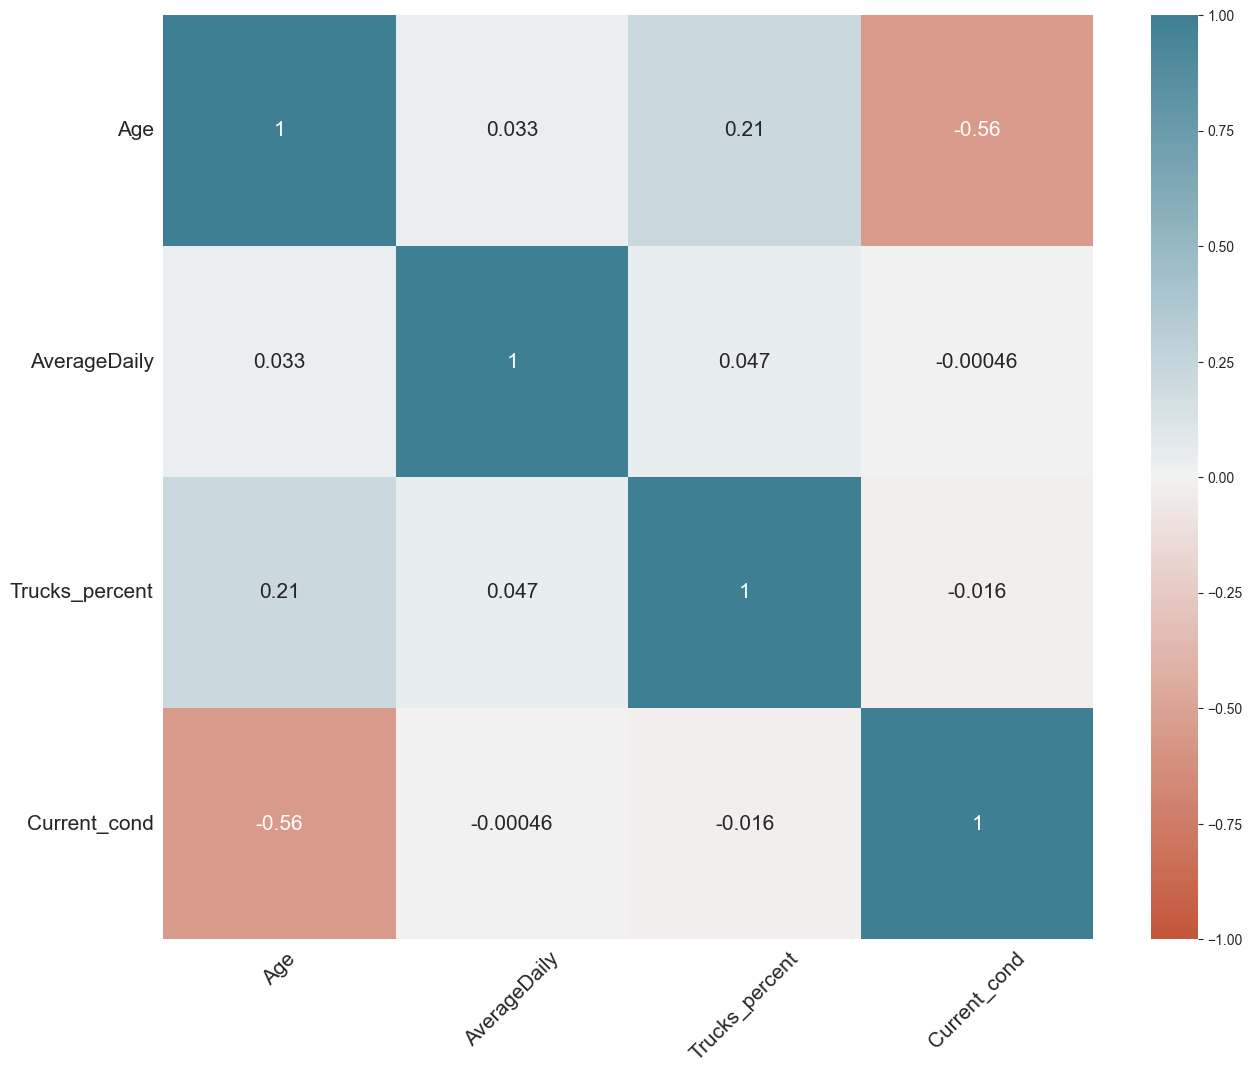

In [13]:
fig,ax = plt.subplots(1,1, figsize=(15,12))
sns.heatmap(continuous_vars.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True),
            annot=True, ax=ax, annot_kws={"size": 15})
_y = plt.yticks(rotation=0, fontsize=15)
_x = plt.xticks(rotation=45, fontsize=15)

### 2.2. The Relationship between Categorical Variables
The contingency table shows the probability that a bridge will be made out of a certain material, given the design used. The most prominent result is that slab designed bridges tend to be made out of concrete 100% of the time. This is important to note as this combination may have an impact on the condition of the bridge. The table also shows that most of the designs (Beam and Others) are predominantly made out of Concrete while only a few are made out of Other and Steel Material. Concrete seems to be a common material in most bridges and so it may be an important predictor of the condition of bridges, which will be discussed upon further analysis.

In [14]:
mat_given_des = pd.crosstab(categorical_vars.Design, categorical_vars.Material, normalize='index')
mat_given_des

Material,Concrete,Others,Steel
Design,,,
Beam,0.792278,0.016495,0.191227
Others,0.729274,0.029347,0.241379
Slab,1.000000,0.000000,0.000000


### 2.3. The Relationship Between Continuous and Categorical Variables - Material

Text(0.5, 0, 'Material')

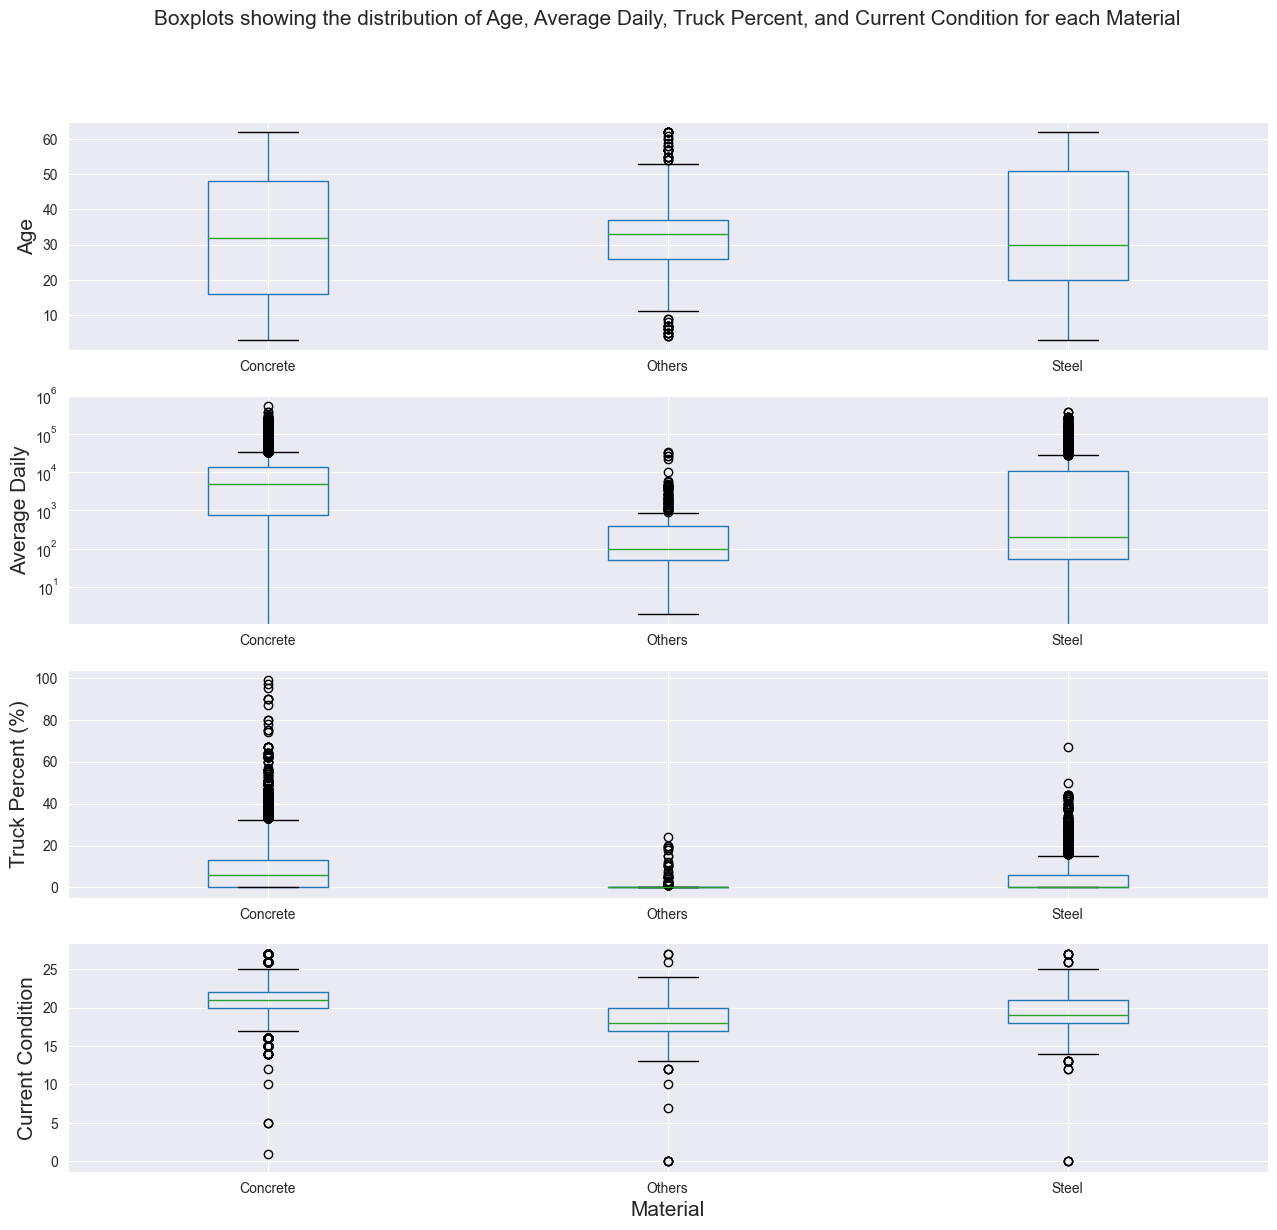

In [15]:
fig, (a1, a2, a3, a4) = plt.subplots(4,1, figsize= (15,14))

bridges.boxplot(column= 'Age', by= 'Material', ax = a1)
bridges.boxplot(column= 'AverageDaily', by= 'Material', ax= a2)
bridges.boxplot(column= 'Trucks_percent', by= 'Material', ax= a3)
bridges.boxplot(column= "Current_cond", by= "Material", ax = a4)

fig.suptitle('Boxplots showing the distribution of Age, Average Daily, Truck Percent, and Current Condition for each Material', fontsize = 15)
[a.set_title('') for a in [a1, a2, a3, a4]]
a1.set_ylabel('Age', fontsize = 15)
a1.set_xlabel('')
a2.set_ylabel('Average Daily', fontsize = 15)
a2.set_xlabel('')
a2.set_yscale('log')
a3.set_ylabel('Truck Percent (%)', fontsize = 15)
a3.set_xlabel('')
a4.set_ylabel("Current Condition", fontsize = 15)
a4.set_xlabel('Material', fontsize = 15)

#### Age and Material
A noticeable boxplot here is for concrete and Age, which happens to be uniformly distributed, meaning that concrete is present in roughly the same proportion across all bridges in Texas. Similarly, Steel is also present like concrete, but with a positive skew, meaning that it is present more in older bridges compared to younger bridges. Most of the bridges that are made from Other Materials are mainly made between 1980s and the early 2000s, however the boxplot does have a lot of outliers on both sides.
<br>

#### Average Daily and Material
The boxplots show that most Concrete and Steel bridges have the highest Average Daily values, meaning that bridges made from concrete and steel tend to be used more often than bridges made from other materials.
<br>

#### Truck Percent and Material
Regardless of Material, it is evident that a lot of the bridges have a truck percent of 0 as the boxplots starts from the bottom. However, to make a comparison, more trucks tend to use bridges made from Concrete and Steel compared to those made from other material. This may be simply due to the fact that there are a greater proportion of bridges made out of concrete and steel compared to other materials.
<br>

#### Current Condition and Material
The boxplots show that bridges made from concrete tend to be in a better condition, followed by bridges made form Steel and Other materials. This is important to note as it shows that bridge materials can be helpful in predicting the current condition of the bridge. However, the materials alone cannot be used to predict the current condition as there is quite an overlap between the boxplots, and therefore this predictor should be considered in conjunction with other variables to give a more accurate estimate of current condition.
<br>


### 2.4. The Relationship between Continuous and Categorical Variables - Design

Text(0.5, 0, 'Design')

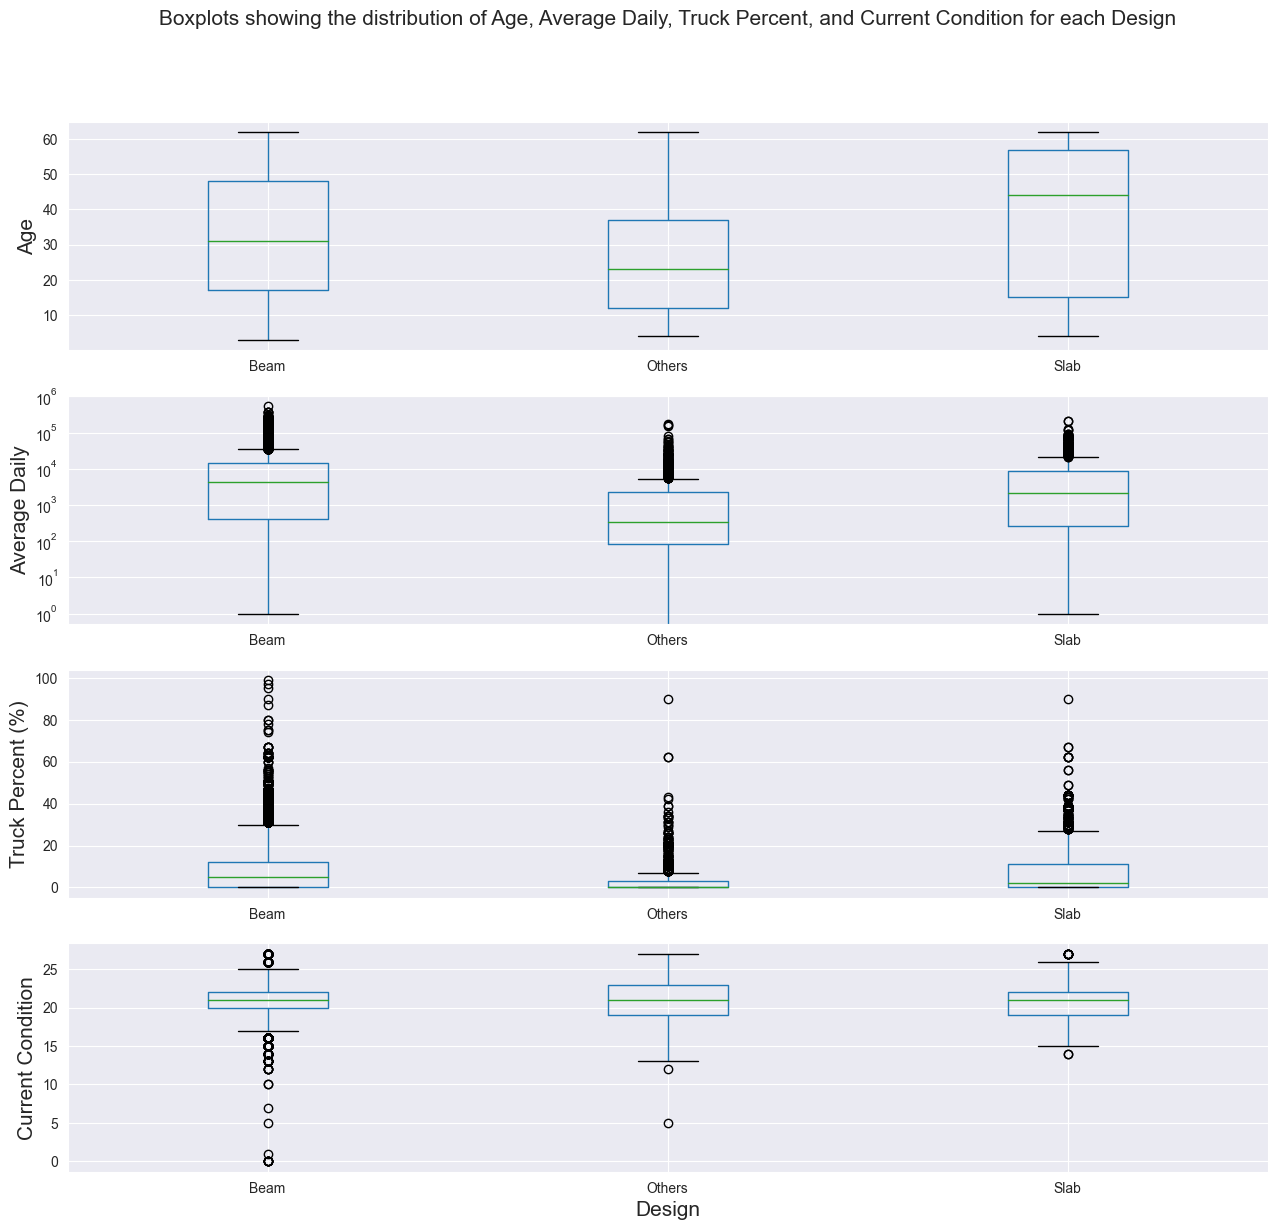

In [16]:
fig, (a1, a2, a3, a4) = plt.subplots(4,1, figsize= (15,14))

bridges.boxplot(column= 'Age', by= 'Design', ax = a1)
bridges.boxplot(column= 'AverageDaily', by= 'Design', ax= a2)
bridges.boxplot(column= 'Trucks_percent', by= 'Design', ax= a3)
bridges.boxplot(column= "Current_cond", by= "Design", ax = a4)

# Make the plots a bit clearer
fig.suptitle('Boxplots showing the distribution of Age, Average Daily, Truck Percent, and Current Condition for each Design', fontsize = 15)
[a.set_title('') for a in [a1, a2, a3, a4]]
a1.set_ylabel('Age', fontsize = 15)
a1.set_xlabel('')
a2.set_ylabel('Average Daily', fontsize = 15)
a2.set_yscale('log')
a2.set_xlabel('')
a3.set_ylabel('Truck Percent (%)', fontsize = 15)
a3.set_xlabel('')
a4.set_ylabel("Current Condition", fontsize = 15)
a4.set_xlabel('Design', fontsize = 15)

#### Age and Design
The boxplots show that almost all designs have been used in older and newer bridges, with Slab designs being more common for older bridges, followed by Beam and others. Additionally, there is a noticeable negative skew for Slab, which suggest that is being used for newer bridges. Overall, there is a considerable amount of overlap between designs and so the boxplots do not show a 'clear-cut' design used for older/newer bridges.
<br>

#### Average Daily and Design
The boxplots show an overlap between the various bridge designs and their average daily use with similar daily uses for each design. However, for some of the bridges with Other design, the average daily was 0, hence why the boxplot for Other designs lacks a tail.
<br>

#### Truck Percent and Design
Similarly to the Materials boxplots, a lot of the bridges by Design were also not used a lot by trucks, which is why the boxplots are all at the bottom of the graph. That said, it does appear that Slab and Beam designed bridges seemed to be used by trucks far more than bridges with Other design.
<br>

#### Current Condition and Design
In general, bridges with Beam design seems to be in better condition compared to the other designs due to a smaller boxplot concentrate tightly at the top of the graph. Slab and Other designs also tend to be bridges of good condition too. Again, there is an overlap between the designs and therefore there isn't a clear-cut design that creates a bridge with great current conditions.

### 2.5. Conclusions from Exploratory Analysis in Relation to Current Condition of Bridges
Looking at the various predictors, the most important predictor of current condition seems to be Age, as it has a strong negative correlation, indicating that as bridges age, their condition starts to depreciate. This is expected for any man-made object due to the accumulation of wear and corrosion from the environment over time. This section also shows that on average, bridges made out of concrete and designed as Beams tends to have better current condition; this is an important take-away message as the vast majority (~70%) of all bridges are made this way, which means the majority of bridges in Texas are in good condition. The analysis in this section also indicates that Truck Percent and Average Daily are poor predictors of current condition of the bridges, as they seem to have almost no correlation. That said, the linear regression in the next section may provide more insight into whether they can predict the current condition of the bridge.


## 3. Regression Modelling
A Linear Regression Model is created with the Age, Average Daily, Truck Percent, Material, and Design as the predictors and the current condition as the target variable. For any regression model, it is important that a key number of assumptions are upheld. A few of these assumptions looks at the independence of the predictors, more specifically that there is no significant relationship between the predictor variables. From previous analysis in part 2, it was evidence that there was a negative correlation between Age and Current Condition; this was -0.5 and for this analysis it will be considered not significant enough to be omitted.The categorical variables are converted to dummy variables so that they can be used in the analysis, with the reference for Design being Beam (value = 0) and for Material is concrete (value = 0).

In [17]:
Des = pd.get_dummies(bridges.Design, drop_first= True)
Mat = pd.get_dummies(bridges.Material, drop_first=True)
print(Mat.head())
print(Des.head())

   Others  Steel
0       0      0
1       0      0
2       0      0
4       0      0
5       0      0
   Others  Slab
0       0     1
1       0     1
2       0     0
4       0     0
5       0     0


In [18]:
X = np.column_stack((bridges.Age, bridges.AverageDaily, bridges.Trucks_percent, Des.Others, Des.Slab, Mat.Others, Mat.Steel))
y = bridges.Current_cond
reg = LinearRegression().fit(X, y)

### 3.1. The R2 Value
The R2 value that indicates how well the independent variables of the regression model explain variance from the dependent model. In this case, the R2 value is 0.45 or 45%, which means that the predictors can be used to estimate the current condition of the bridge relatively fine. However, there is also a great amount of variability in the current condition that these predictors are not able to explain, which may indicate the need to use additional predictors to create a stronger model.


In [19]:
print('The R2 coefficient of determination is %4.2f' % reg.score(X, y))

The R2 coefficient of determination is 0.45


### 3.2. Visualisation of Residuals (Errors)
The errors, that is the difference between the predicted current condition and the actual current condition, are visualised through a histogram and a scatter diagram below.

[21.82175772 21.82175772 22.29040686 ... 21.459317   21.10410156
 20.28164014]


Text(0.5, 0.98, 'A Histogram showing the Error in Prediction for the the Linear Regression Model')

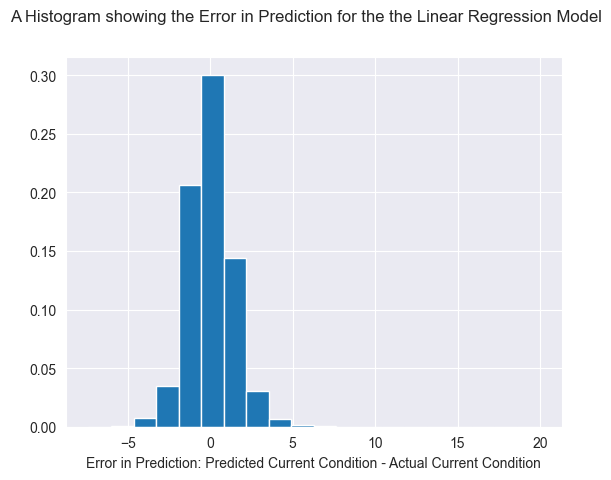

In [20]:
y_hat = reg.predict(X)
print(y_hat)
fig, a1 = plt.subplots(1, 1)
residuals = y_hat - y
a1.hist(residuals, bins=20, density=True)
a1.set_xlabel('Error in Prediction: Predicted Current Condition - Actual Current Condition')
plt.suptitle('A Histogram showing the Error in Prediction for the the Linear Regression Model')

#### Comments about the Error in Prediction
The histogram highlights that the errors in prediction are roughly normally distributed around 0. This means that the errors above and below the fitted model are roughly equal in proportion. This is seen more clearly in the scatter plot below.

Text(0.5, 1.0, 'A Scatter Plot showing the Fit between Predicted and Actual Values for Current Condition')

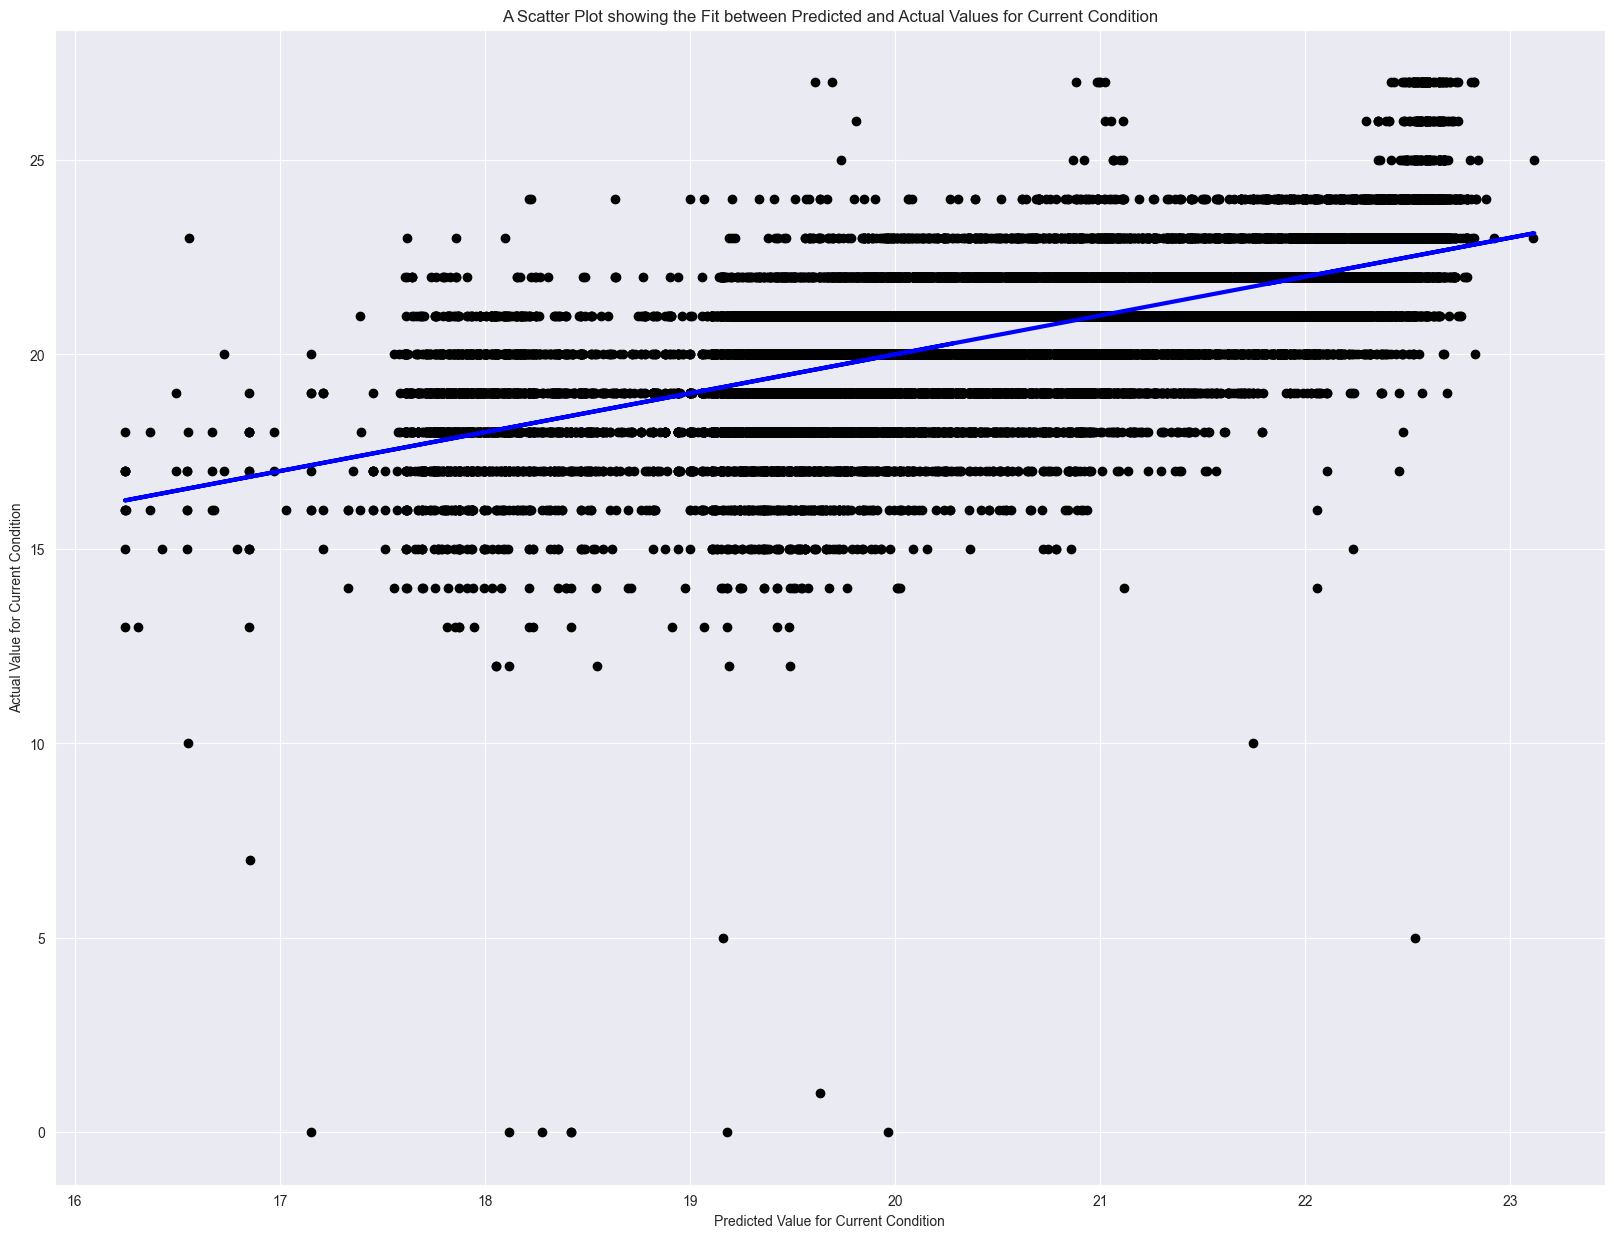

In [21]:
fig, a = plt.subplots(1,1,figsize=(20,15))
a.scatter(y_hat, y,  color='black')
a.plot(y_hat, y_hat, color='blue', linewidth=3)

a.set_xlabel('Predicted Value for Current Condition')
a.set_ylabel('Actual Value for Current Condition')
plt.title("A Scatter Plot showing the Fit between Predicted and Actual Values for Current Condition")

#### Comment about the Scatter Plot
The Scatter Plot shows a line of best fit with roughly a proportional amount of values above and below the line. This shows that the errors are roughly equal above and below the linear regression model, meaning that the model is not fit too tightly. It also indicates that there is room for improvement and for the model to be fit tighter to the values. Both the diagrams go hand in hand with the R2 value is saying that the model only accounts for ~45% of variability in the current condition.

### 3.3. The Regression Coefficients for the Model
The Regression Coefficients are printed out below, however it is really difficult to compare them to one another. Therefore, they are transformed to show a change in Current Condition of bridges as a percent of its range.

In [22]:
beta_age, beta_avgdaily, beta_truckpercent, beta_des_others, beta_des_slabs, beta_mat_others, beta_mat_steel = reg.coef_.round(3)

print(f"The estimated regression coefficient for Age is {beta_age}.")
print(f"The estimated regression coefficient for Average Daily is {beta_avgdaily}.")
print(f"The estimated regression coefficient for Truck percent is {beta_truckpercent}.")
print(f"The estimated regression coefficient for Other Designs is {beta_des_others}.")
print(f"The estimated regression coefficient for Slab Designs is {beta_des_slabs}.")
print(f"The estimated regression coefficient for Other Materials is {beta_mat_others}.")
print(f"The estimated regression coefficient for Steel Materials is {beta_mat_steel}.")

The estimated regression coefficient for Age is -0.06.
The estimated regression coefficient for Average Daily is -0.0.
The estimated regression coefficient for Truck percent is 0.005.
The estimated regression coefficient for Other Designs is 0.009.
The estimated regression coefficient for Slab Designs is -0.046.
The estimated regression coefficient for Other Materials is -2.907.
The estimated regression coefficient for Steel Materials is -1.54.


In [23]:
age_range = bridges.Age.quantile(0.9) - bridges.Age.quantile(0.1)
avgdaily_range = bridges.AverageDaily.quantile(0.9) - bridges.AverageDaily.quantile(0.1)
truckpercent_range = bridges.Trucks_percent.quantile(0.9) - bridges.Trucks_percent.quantile(0.1)
material_range = 1
design_range = 1
condition_range = bridges.Current_cond.quantile(0.9) - bridges.Current_cond.quantile(0.1)

In [24]:
print('The change in Current Condition (as a percent of its range) given by the Age coefficient (over its range) is %4.1f percent'
       % (100 * (beta_age * age_range) / condition_range))
print('The change in Current Condition (as a percent of its range) given by the Average Daily coefficient (over its range) is %4.1f percent'
       % (100 * (beta_avgdaily * avgdaily_range) / condition_range))
print('The change in Current Condition (as a percent of its range) given by the Truck Percent coefficient (over its range) is %4.1f percent'
       % (100 * (beta_truckpercent * truckpercent_range) / condition_range))
print('The change in Current Condition (as a percent of its range) given by the Other Design coefficient (over its range) is %4.1f percent'
       % (100 * (beta_des_others * design_range) / condition_range))
print('The change in Current Condition (as a percent of its range) given by the Slab Design coefficient (over its range) is %4.1f percent'
       % (100 * (beta_des_slabs * design_range) / condition_range))
print('The change in Current Condition (as a percent of its range) given by the Other Material coefficient (over its range) is %4.1f percent'
       % (100 * (beta_mat_others * material_range) / condition_range))
print('The change in Current Condition (as a percent of its range) given by the Steel Material coefficient (over its range) is %4.1f percent'
       % (100 * (beta_mat_steel * material_range) / condition_range))

The change in Current Condition (as a percent of its range) given by the Age coefficient (over its range) is -56.4 percent
The change in Current Condition (as a percent of its range) given by the Average Daily coefficient (over its range) is -0.0 percent
The change in Current Condition (as a percent of its range) given by the Truck Percent coefficient (over its range) is  2.2 percent
The change in Current Condition (as a percent of its range) given by the Other Design coefficient (over its range) is  0.2 percent
The change in Current Condition (as a percent of its range) given by the Slab Design coefficient (over its range) is -0.9 percent
The change in Current Condition (as a percent of its range) given by the Other Material coefficient (over its range) is -58.1 percent
The change in Current Condition (as a percent of its range) given by the Steel Material coefficient (over its range) is -30.8 percent


#### Comment about Regression Coefficients for Continuous Variables
Looking at the continuous variables, it is abundantly clear that there is a negative relationship between the Age variable and it's ability to predict the current condition of the bridge, meaning that the older the bridge is the poorer the current condition of the bridge. This aligns with our previous analysis in Part 2, where we established that Age and Current Condition are negatively correlated. Additionally, there is a very small positive correlation between the Truck Percent and current condition, however it is not significant enough to be a strong predictor of current condition. These results are similar to the correlation matrix in Part 2.
<br>

#### Comment about Regression Coefficients for Categorical
The Regression coefficients show that the bridge Design is a poor predictor of current condition as most of the values are closer to 0, and therefore aren't significant enough to inform one about the current condition of the bridge. On the other hand, the Material that the bridge is constructed with seems to have some level of significance in predicting the current condition of the bridge. The coefficient shows that Other Materials and Steel Materials have a large negative percent (-58% and -31% respectively). This means that both these two categories of materials are poor at predicting the current condition of the bridge in relation to Concrete. It also suggests that concrete may be a good predictor of bridge conditions.


### 3.4. Comprehensive Conclusion on Bridge Analysis
Overall, look at the entire analysis, it is evident that the predictor variables are relatively fine in predicting the current condition of the bridge. The analysis from Part 2 and Part 3 shows that the selected variables are able to predict the current condition of approximately ~45% of bridges. This indicates that chosen variables can somewhat predict the current condition of Texan bridges. That said, it also suggests that there is room for improvement in this analysis; there were only two variables (Age and Material) that had more influence in predicting  the current condition of the bridge. Perhaps other variables from the bridges tables, such as Length and Width of the bridges are able to explain the current condition better? Generally, larger bridges (longer length and wider width) tend to be exposed more to the corrosive effects of the environment and therefore may have poorer current conditions in relation to smaller bridges. To conclude, two of the chosen variables had an influence in predicting the bridge condition, and adjusting the predictors with other variables from bridges may yield in a better predictor of bridge conditions.